In [1]:
import pandas as pd

# Load the cleaned dataset after EDA
df = pd.read_csv(r"C:\Users\nagab\Downloads\clean_data_after_eda.csv")

# Quick overview
print(df.info())
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [2]:
# Drop columns with only 1 unique value
for col in df.columns:
    if df[col].nunique() == 1:
        df.drop(col, axis=1, inplace=True)

# Optional: drop other irrelevant columns if any
# df.drop(['some_column'], axis=1, inplace=True)

print("Columns after removal:", df.columns.tolist())


Columns after removal: ['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'var_year_price_off_peak_var', 'var_year_price_peak_var', 'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix', 'var_year_price_peak_fix', 'var_year_price_mid_peak_fix', 'var_year_price_off_peak', 'var_year_price_peak', 'var_year_price_mid_peak', 'var_6m_price_off_peak_var', 'var_6m_price_peak_var', 'var_6m_price_mid_peak_var', 'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix', 'var_6m_price_mid_peak_fix', 'var_6m_price_off_peak', 'var_6m_price_peak', 'var_6m_price_mid_peak', 'churn']


In [3]:
# Convert date columns to datetime
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Extract year, month, day, weekday
for col in date_cols:
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day
    df[f'{col}_weekday'] = df[col].dt.weekday

df.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,date_end_day,date_end_weekday,date_modif_prod_year,date_modif_prod_month,date_modif_prod_day,date_modif_prod_weekday,date_renewal_year,date_renewal_month,date_renewal_day,date_renewal_weekday
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,15,2,2015,11,1,6,2015,6,23,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,30,1,2009,8,21,4,2015,8,31,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,16,5,2010,4,16,4,2015,4,17,4
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30,2,2010,3,30,1,2015,3,31,1
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,7,0,2010,1,13,2,2015,3,9,0


In [4]:
# Total consumption
df['total_consumption'] = df['cons_12m'] + df['cons_gas_12m']

# Average monthly electricity consumption
df['avg_monthly_consumption'] = df['cons_12m'] / 12

# Last month consumption ratio
df['cons_ratio_last_month'] = df['cons_last_month'] / (df['cons_12m'] + 1e-6)

df[['total_consumption', 'avg_monthly_consumption', 'cons_ratio_last_month']].head()


,total_consumption,avg_monthly_consumption,cons_ratio_last_month
0,54946,0.000000,0.00000
1,4660,388.333333,0.00000
2,544,45.333333,0.00000
3,1584,132.000000,0.00000
4,4425,368.750000,0.11887


In [5]:
# Contract length in days
df['contract_length_days'] = (df['date_end'] - df['date_activ']).dt.days

# Margin ratio (net/gross)
df['margin_ratio'] = df['margin_net_pow_ele'] / (df['margin_gross_pow_ele'] + 1e-6)

# Years with company
df['years_with_company'] = df['num_years_antig']

df[['contract_length_days', 'margin_ratio', 'years_with_company']].head()


,contract_length_days,margin_ratio,years_with_company
0,1096,1.0,3
1,2566,1.0,6
2,2192,1.0,6
3,2192,1.0,6
4,2245,1.0,6


In [10]:
# -------------------------------
# Step 6 & 7: Create Off-Peak Price Difference Feature and Handle Missing Values
# -------------------------------

import pandas as pd

# Load price data
price_df = pd.read_csv(r"C:\Users\nagab\Downloads\historical_pricing_data.csv")

# Convert date column
price_df['price_date'] = pd.to_datetime(price_df['price_date'])
price_df['month'] = price_df['price_date'].dt.month
price_df['year'] = price_df['price_date'].dt.year

# Extract December prices
dec_prices = price_df[price_df['month'] == 12][['id','year','price_off_peak_var']]
dec_prices = dec_prices.rename(columns={'price_off_peak_var':'dec_price'})

# Extract January prices
jan_prices = price_df[price_df['month'] == 1][['id','year','price_off_peak_var']]
jan_prices = jan_prices.rename(columns={'price_off_peak_var':'jan_price'})
# Shift January year to align with previous December
jan_prices['year'] = jan_prices['year'] - 1

# Merge December and January prices
price_diff = pd.merge(dec_prices, jan_prices, on=['id','year'], how='left')
price_diff['off_peak_price_diff'] = price_diff['dec_price'] - price_diff['jan_price']

# Take latest available year per customer
latest_diff = price_diff.groupby('id')['off_peak_price_diff'].last().reset_index()

# -------------------------------
# Merge into main dataframe (df) and remove previous duplicate columns if exist
# -------------------------------
df = df.drop(columns=[col for col in df.columns if 'off_peak_price_diff' in col], errors='ignore')
df = df.merge(latest_diff, on='id', how='left')

# Fill missing off_peak_price_diff with 0
df['off_peak_price_diff'] = df['off_peak_price_diff'].fillna(0)

# -------------------------------
# Handle remaining missing values
# -------------------------------

# Fill numeric NaNs with median
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical NaNs with 'Unknown'
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

# Check the dataframe
df.info()
df[['id','off_peak_price_diff']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

,id,off_peak_price_diff
0,24011ae4ebbe3035111d65fa7c15bc57,0.0
1,d29c2c54acc38ff3c0614d0a653813dd,0.0
2,764c75f661154dac3a6c254cd082ea7d,0.0
3,bba03439a292a1e166f80264c16191cb,0.0
4,149d57cf92fc41cf94415803a877cb4b,0.0


In [11]:
# -------------------------------
# Step 8: Additional Feature Engineering
# -------------------------------

# 1️⃣ Total consumption over the last year already exists: let's create average monthly consumption if not already done
if 'avg_monthly_consumption' not in df.columns:
    df['avg_monthly_consumption'] = df['cons_12m'] / 12

# 2️⃣ Ratio of gas consumption to total consumption
df['gas_ratio'] = df['cons_gas_12m'] / df['cons_12m']
df['gas_ratio'] = df['gas_ratio'].fillna(0)  # handle division by zero

# 3️⃣ Contract length in months
df['contract_length_months'] = df['contract_length_days'] / 30

# 4️⃣ Margin ratio: net margin relative to gross margin
df['margin_ratio'] = df['margin_net_pow_ele'] / df['margin_gross_pow_ele']
df['margin_ratio'] = df['margin_ratio'].replace([float('inf'), -float('inf')], 0).fillna(0)

# 5️⃣ Years with company: derive from activation date if not already present
if 'years_with_company' not in df.columns:
    df['years_with_company'] = (pd.to_datetime('today') - df['date_activ']).dt.days / 365

# 6️⃣ Consumption change ratio: last month vs average
df['cons_ratio_last_month'] = df['cons_last_month'] / df['avg_monthly_consumption']
df['cons_ratio_last_month'] = df['cons_ratio_last_month'].replace([float('inf'), -float('inf')], 0).fillna(0)

# 7️⃣ Binary feature: Has gas or not
df['has_gas_flag'] = df['has_gas'].apply(lambda x: 1 if x=='t' else 0)

# 8️⃣ Day of week features for activation, end, and renewal
for col in ['date_activ','date_end','date_renewal']:
    df[f'{col}_weekday'] = df[col].dt.weekday

# Check new features
df.head()[['id','off_peak_price_diff','avg_monthly_consumption','gas_ratio','contract_length_months',
           'margin_ratio','years_with_company','cons_ratio_last_month','has_gas_flag']]


,id,off_peak_price_diff,avg_monthly_consumption,gas_ratio,contract_length_months,margin_ratio,years_with_company,cons_ratio_last_month,has_gas_flag
0,24011ae4ebbe3035111d65fa7c15bc57,0.0,0.000000,inf,36.533333,1.0,3,0.000000,1
1,d29c2c54acc38ff3c0614d0a653813dd,0.0,388.333333,0.0,85.533333,1.0,6,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,0.0,45.333333,0.0,73.066667,1.0,6,0.000000,0
3,bba03439a292a1e166f80264c16191cb,0.0,132.000000,0.0,73.066667,1.0,6,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,0.0,368.750000,0.0,74.833333,1.0,6,1.426441,0


In [15]:
# 9️⃣ Prepare data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Separate target variable
y = df['churn']
X = df.drop(['churn', 'id'], axis=1)  # Drop target and ID

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify numeric columns
num_cols = X.select_dtypes(include=['int64','float64']).columns

# Replace inf/-inf with NaN
X_train[num_cols] = X_train[num_cols].replace([np.inf, -np.inf], np.nan)
X_test[num_cols] = X_test[num_cols].replace([np.inf, -np.inf], np.nan)

# Fill NaN values with median of each column
for col in num_cols:
    median_val = X_train[col].median()
    X_train[col] = X_train[col].fillna(median_val)
    X_test[col] = X_test[col].fillna(median_val)

# Standard scaling
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())


X_train shape: (11684, 68)
X_test shape: (2922, 68)
y_train distribution:
 churn
0    10549
1     1135
Name: count, dtype: int64


In [20]:
# -----------------------------
# 1️⃣ Prepare features and target
# -----------------------------
y = df['churn']

# Drop datetime columns and identifier
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns
X = df.drop(columns=['churn', 'id'] + list(datetime_cols))

# -----------------------------
# 2️⃣ Handle missing or infinite values
# -----------------------------
import numpy as np

X.replace([np.inf, -np.inf], np.nan, inplace=True)

# -----------------------------
# 3️⃣ Encode categorical columns
# -----------------------------
cat_cols = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# -----------------------------
# 4️⃣ Fill remaining NaNs
# -----------------------------
num_cols = X.select_dtypes(include=['int64','float64']).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# -----------------------------
# 5️⃣ Train-test split
# -----------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 6️⃣ Scale numeric columns
# -----------------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# -----------------------------
# 7️⃣ Train Random Forest
# -----------------------------
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

# -----------------------------
# 8️⃣ Predict and evaluate
# -----------------------------
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8713210130047913
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2638
           1       0.33      0.32      0.33       284

    accuracy                           0.87      2922
   macro avg       0.63      0.63      0.63      2922
weighted avg       0.87      0.87      0.87      2922



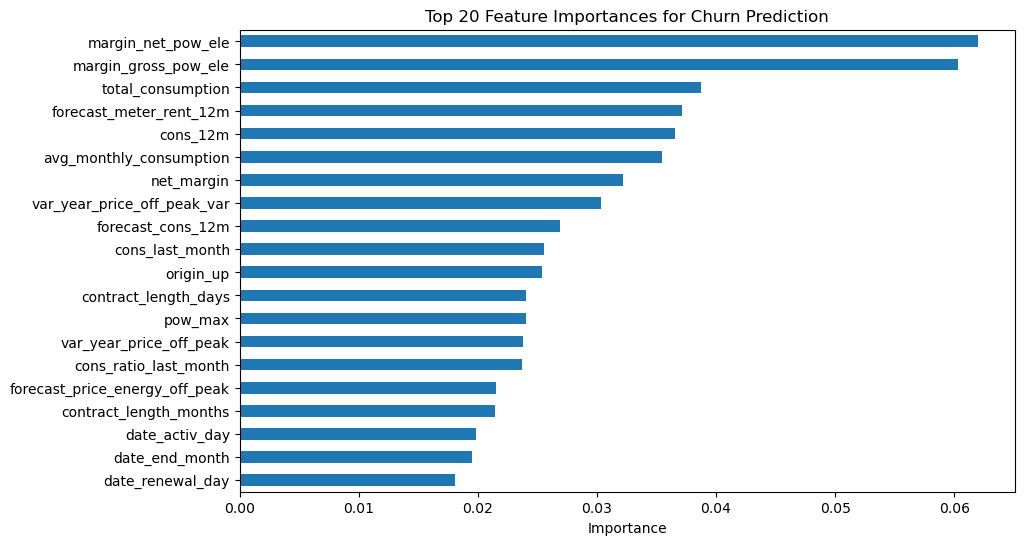

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the trained model
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort and plot top 20 features
top_features = feature_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances for Churn Prediction")
plt.xlabel("Importance")
plt.show()


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:,1]

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


[[2454  184]
 [ 192   92]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2638
           1       0.33      0.32      0.33       284

    accuracy                           0.87      2922
   macro avg       0.63      0.63      0.63      2922
weighted avg       0.87      0.87      0.87      2922

ROC-AUC Score: 0.7007108992087476


In [23]:
# Save the processed dataframe to a CSV file
df.to_csv("processed_data_for_churn.csv", index=False)

# Optionally, save a list of feature columns used for modeling
feature_columns = [col for col in df.columns if col not in ['id', 'churn']]
with open("feature_columns.txt", "w") as f:
    for col in feature_columns:
        f.write(f"{col}\n")

print("✅ Processed dataset and feature list saved successfully!")


✅ Processed dataset and feature list saved successfully!
